In [133]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random as rand
matplotlib.style.use("ggplot")
%matplotlib inline

## **Testing random choice **

In [2]:
%%time
p = 0.4
N = 10**1
p= np.random.choice([1,0], N,p=[p, 1-p]).sum()/N
print(p)


0.4
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 430 µs


## testing average matrix from numpy

In [3]:
data = np.array([[0, 1],
       [2, 3],
       [4, 5]])
np.average(data, axis=0,weights=[1./4, 2./4, 1/4])

array([ 2.,  3.])

# Class for a single population

In [4]:
class population:
    def __init__(self, plist, N):
        self.plist = np.array(plist)
        self.N = N
        
        self.Rb = 1
        self.k = 20000
        self.rd = 10**(-3)
    
    def update(self):

        birth = int(self.N*self.Rb*(1 - self.N/self.k))

        if birth == 0: Birthplist = np.zeros(len(self.plist)); print('no birth')
        else:Birthplist = np.array([np.random.choice([1,0], birth,p=[pi, 1-pi]).sum()/birth for pi in self.plist])

        death = self.rd*self.N**2
        survived = int(self.N - death)
        if survived == 0: Survivingplist = np.zeros(len(self.plist));print('ish')
        Survivingplist = np.array([np.random.choice([1,0], survived ,p=[pi, 1-pi]).sum()/survived for pi in self.plist])

        self.N += birth - death
        if self.N <= 0: print("dead pop")

        birthNSurvivedMatrix = np.array([Birthplist, Survivingplist])
        self.plist = np.average(birthNSurvivedMatrix, axis = 0, weights=[birth/self.N,survived/self.N])
        

        
        
    def Hlist(self): return np.array([2*p*(1-p) for p in self.plist])
    def averageH(self): return self.Hlist().mean()
        

# One Population Simulation

In [5]:
plista = np.array([np.random.rand() for i in range(10)])
Na = 200
sidea = population(plista, Na)

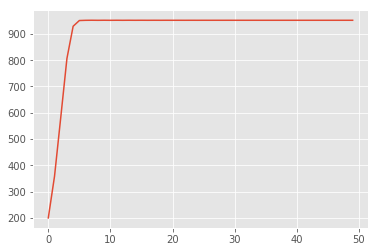

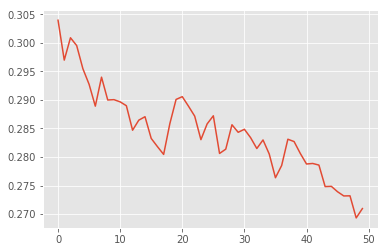

CPU times: user 400 ms, sys: 392 ms, total: 792 ms
Wall time: 342 ms


In [6]:
%%time
history = []
Hhistory = []
for i in range(50): 
    history += [sidea.N] 
    Hhistory += [sidea.averageH()]
    sidea.update()
    
plt.plot(history, label = "popsize");
plt.show()
plt.plot(Hhistory, label = 'H');
plt.show()


# Making class to Simulate migration

In [7]:
class wholePop:
    def __init__(self, populationA, populationB): 
        self.popa = populationA
        self.popb = populationB
        self.alphaA = .2
        self.alphaB = .2
        self.deathprob = .3
        self.nRoadsCrossedPerTimeUnit = 3
    def migrate(self):
        
        AtoB = self.alphaA*self.popa.N
        survivedAtoB = (1-self.deathprob)*AtoB
        BtoA = self.alphaB*self.popb.N
        survivedBtoA = (1- self.deathprob)*BtoA
        
        self.popa.N += survivedBtoA - AtoB
        self.popb.N += survivedAtoB - BtoA
        
    def update(self):
        self.popa.update() 
        self.popb.update()
        self.migrate()
        
    def FSTlist(self):
        PfreqMatrix = np.array([self.popa.plist, self.popb.plist])
        avgPFreq = np.average(PfreqMatrix, axis = 0 , weights = [.5,.5])
        expectedHlist = np.array([2*p*(1-p) for p in avgPFreq])
        
        HlistMatrixFromPops = np.array([self.popa.Hlist(), self.popb.Hlist()])
        ObservedHlistBothPops = np.average(HlistMatrixFromPops, axis = 0,  weights = [.5,.5])
        
        with np.errstate(divide='ignore', invalid='ignore'):
            subtraction = (expectedHlist - ObservedHlistBothPops)
            result = np.true_divide(subtraction,expectedHlist)
            result[result == np.inf] = 0
            result = np.nan_to_num(result)
        
        return result
    
    def FST(self): return self.FSTlist().mean()
        
        

# Adding another population

In [8]:
plist = np.array([np.random.rand() for i in range(10)])
Na = 500
sidea = population(plist, Na)
sideb = population(plist, Na)
bothsides = wholePop(sidea, sideb)


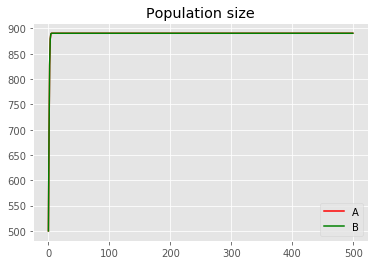

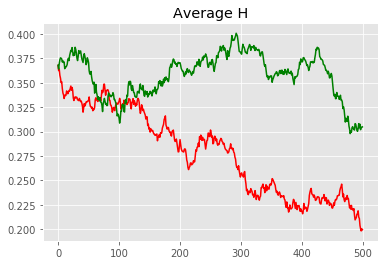

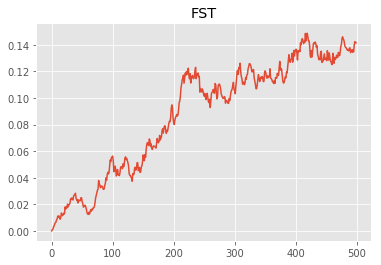

CPU times: user 1.46 s, sys: 672 ms, total: 2.13 s
Wall time: 1.38 s


In [9]:
%%time
historyA = []; historyB = []
HhistoryA = []; HhistoryB = []
FST_list = []
for i in range(500): 
    historyA += [bothsides.popa.N] 
    HhistoryA += [bothsides.popa.averageH()]
    historyB += [bothsides.popb.N] 
    HhistoryB += [bothsides.popb.averageH()]
    FST_list += [bothsides.FST()]
    bothsides.update()

    
plt.plot(historyA, label = "A", color = 'r');
plt.plot(historyB, label = "B", color = 'g');
plt.title("Population size")
plt.legend()
plt.show()
plt.plot(HhistoryA, label = 'A', color = 'r');
plt.plot(HhistoryB, label = 'B', color = 'g');
plt.title('Average H')
plt.show()
plt.plot(FST_list)
plt.title('FST')
plt.show()

## reset values
plist = np.array([np.random.rand() for i in range(10)])
Na = 100
sidea = population(plist, Na)
sideb = population(plist, Na)
bothsides = wholePop(sidea, sideb)

## FST heatmap altering migration and death

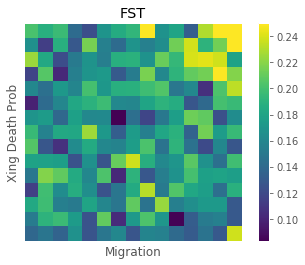

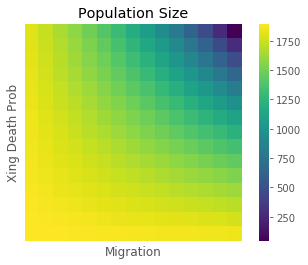

CPU times: user 13min 42s, sys: 572 ms, total: 13min 42s
Wall time: 1h 28min 22s


In [36]:
%%time
XD, M = 15, 15
heatmap = np.zeros((XD,M))
heatmap_pop = np.zeros((XD,M))
plist = np.array([np.random.rand() for i in range(50)])
Na = 500

for Dcounter, deathrateI in enumerate(np.linspace(0.05, .95 , XD)):
    for Mcounter, migrationI in enumerate(np.linspace(0.05, .52, M)):
        sidea = population(plist, Na)
        sideb = population(plist, Na)
        bothsides = wholePop(sidea, sideb)
        bothsides.deathprob = deathrateI
        bothsides.alphaA, bothsides.alphaB = migrationI, migrationI
        
        for i in range(500): bothsides.update()
        heatmap[Dcounter, Mcounter] = bothsides.FST()
        heatmap_pop[Dcounter, Mcounter] = bothsides.popa.N + bothsides.popb.N
        
plt.imshow(heatmap, origin = 'lower', vmax = .25)
plt.title('FST')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap", figsize= (10,10),  bbox_inches='tight', DPI = 300)
plt.show()
plt.close()

plt.imshow(heatmap_pop, origin = 'lower')
plt.title('Population Size')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap_pop", figsize= (10,10),  bbox_inches='tight', DPI = 300)
plt.show()
            
        
        

##### from the heatmaps generated it's possible to conclude that the major factor in driving FST upwards is the population size. Meanwhile the migration and xsing probabilities aren't as important as expected

# Infinite Allele Model 

In [172]:
class microsattelite:
    def __init__(self, initial_list):
        self.microsat = np.array(initial_list)
        self.mutation_rate = 10**(-3)
        self.initialAlleleCount = len(initial_list)
        
    def Allele_count(self):
        return len(self.microsat)
        
    def New_mutation(self, N):
        if N <= 0: print('zero division here'); N= 1
        self.microsat*=((N-1)/N)
        self.microsat = np.append(self.microsat, [1/N])

    def number_of_mutation_that_occured(self, N, sigma): 
        return np.random.choice([1,0], N,p=[sigma, 1-sigma]).sum()
    
    
    #tested and working
    def sample_generator(self, Nsamples, rep = True):
        if Nsamples <= 0: print('major error here')
        new_list = np.zeros(self.Allele_count())
        alleleSamples = np.random.choice(self.Allele_count(), Nsamples ,p=self.microsat, replace= rep)
        for i in alleleSamples: new_list[i] += 1
            
        return microsattelite(new_list/Nsamples)
    
    def Heterozygosity(self):
        return 1 - np.array([x**2 for x in self.microsat]).sum()
    
    def trim_null_microsats(self):
        self.microsat = self.microsat[self.microsat != 0]   
        
    
def generate_random_microsatellite_list(size, nalleles):
    tempList = []
    for j in range(size):
        randomprobs = np.array([rand.random() for i in range(nalleles)])
        randomprobs *= 1/randomprobs.sum()
        tempList += [microsattelite(randomprobs)]
    return np.array(tempList)
    
        
#tested and working        
def weighted_avg_microsat(microsat1, n1, microsat2, n2):
    if n1+ n2<=0: print('error_avg microsat'); return 0
    avg = [(microsat1.microsat[i]*n1 + microsat2.microsat[i]*n2)/(n1+n2) for i in range(microsat1.Allele_count())]
    #avg = np.average([microsat1.microsat, microsat2.microsat], axis=0, weights=[n1,n2]) #this is slower for some reason
    return microsattelite(np.array(avg))



class population_IAM:
    def __init__(self, plist, N):
        self.microsatLIST = np.array(plist)
        self.N = N
        self.Rb = 1
        self.k = 20000
        self.mutationrate = 10**(-3)
        self.rd = 10**(-3)
            
    def update(self):

        birth = int(self.N*self.Rb*(1 - self.N/self.k))

        Birthsamples = np.array([eachmicrosat.sample_generator(birth) for eachmicrosat in self.microsatLIST])

        death = self.rd*self.N**2
        survived = int(self.N - death)
        if survived == 0: Survivingplist = np.zeros(len(self.plist));print('ish')
        ##surviving samples should not have replacement -> go back here eventually
        ##Survivingsamples = np.array([eachmicrosat.sample_generator(survived) for eachmicrosat in self.microsatLIST])
        ##will consider that death does not change the frequencies for the moment
        self.N = birth + survived
        if self.N <= 0: print("dead pop")

        self.microsatLIST = [weighted_avg_microsat(Birthsamples[i],birth, self.microsatLIST[i], survived) for i in range(len(self.microsatLIST))]
        self.microsatLIST = np.array(self.microsatLIST)
        
        for eachsat in self.microsatLIST: 
            eachsat.trim_null_microsats()
            for i in range(eachsat.number_of_mutation_that_occured(birth, self.mutationrate)):  eachsat.New_mutation(self.N)
        
    def Hlist(self): return np.array([x.Heterozygosity() for x in self.microsatLIST])
    def averageH(self): return self.Hlist().mean()
        
        
        

testing weighted avg function and heterozygosity function

In [128]:
%%time
a = microsattelite([.5,.5])
b = microsattelite([.3, .7])
c =weighted_avg_microsat(a, 1000000, b,5)
print(c.microsat)
print(c.Heterozygosity())
a.New_mutation(100)
print(a.microsat)


[ 0.499999  0.500001]
0.499999999998
[ 0.495  0.495  0.01 ]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 718 µs


testing sample generator function

In [131]:
%%time
a = microsattelite([.5,.5])
b = a.sample_generator(100)
print(b.microsat)



[ 0.43  0.57]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 647 µs


testing initial microsat generator

In [149]:
a = generate_random_microsatellite_list(3, 2)
print(a[2].microsat.sum())

1.0


## Testing a single population in the IAM model

In [ ]:
%%time

sidea = population_IAM(generate_random_microsatellite_list(10, 3), 200)
history = []
Hhistory = []
for i in range(5000): 
    history += [sidea.N] 
    Hhistory += [sidea.averageH()]
    sidea.update()
    
plt.plot(history, label = "popsize");
plt.show()
plt.plot(Hhistory);
plt.title('Heterozigosity')
plt.show()
print([x.Allele_count() for x in sidea.microsatLIST])
